# <span style="color:red"> NSL Esercitazione 12 </span>
### <span style="color:pink">  Giacomo Boringhieri 13457A</span>

L'obiettivo di questo esercizio è utilizzare modelli di rete neurale profonda con la libreria Keras per riconoscere e classificare immagini di cifre da 0 a 9. Il dataset MNIST contiene 70.000 immagini di numeri scritti a mano, ciascuna rappresentata come una matrice 28x28 pixel. Ogni pixel può assumere 256 valori di intensità di grigio, compresi tra 0 (nero) e 255 (bianco). Trattandosi di un *problema di classificazione* su 10 categorie distinte (le cifre da 0 a 9), l'obiettivo è addestrare un modello a riconoscere correttamente a quale cifra corrisponde ciascuna immagine.

In questo esperimento utilizziamo una **rete neurale feedforward** completamente connessa (Dense) con la seguente architettura:
- **Layer di input**: 784 neuroni (28×28 pixel appiattiti)
- **Primo layer nascosto**: 400 neuroni con attivazione **ReLU**
- **Secondo layer nascosto**: 100 neuroni con attivazione **ReLU** 
- **Layer di Dropout**: 50% per ridurre l'overfitting
- **Layer di output**: 10 neuroni con attivazione **softmax** (classificazione multi-classe)

### Funzione di Attivazione: ReLU
La **ReLU (Rectified Linear Unit)** è definita come f(x) = max(0, x).
- Risolve il problema del *vanishing gradient*
- È computazionalmente efficiente
- Introduce non-linearità mantenendo la semplicità

### Algoritmi di Ottimizzazione Confrontati:

**1. SGD (Stochastic Gradient Descent)**
- Ottimizzatore che aggiorna i pesi usando il gradiente della loss
- Semplice ma può essere lento nella convergenza
- Formula: θ = θ - α∇J(θ)

**2. Adam (Adaptive Moment Estimation)**
- Mantiene medie mobili esponenziali dei momenti del gradiente
- Auto-adatta il learning rate per ogni parametro
- Generalmente converge più velocemente di SGD

**3. Adamax**
- Variante di Adam basata sulla norma infinita
- Più stabile di Adam in alcuni contesti

L'obiettivo è confrontare le prestazioni di questi tre ottimizzatori sulla stessa architettura per il riconoscimento di cifre MNIST.

## <span style="color:blue">  Esercizio 12.1</span>

Ora ho imposto il seed, questo affinchè ogni esecuzione sia uguale alla precendete 

In [1]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

Prendo il dataset MINST, per utilizzarlo dobbiamo riformattarlo per avere matrici

In [4]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, Adamax

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)


 Attivazione: relu, Ottimizzatore: SGD


2025-09-25 17:47:54.940024: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 Accuracy: 0.9676, Loss: 0.1068


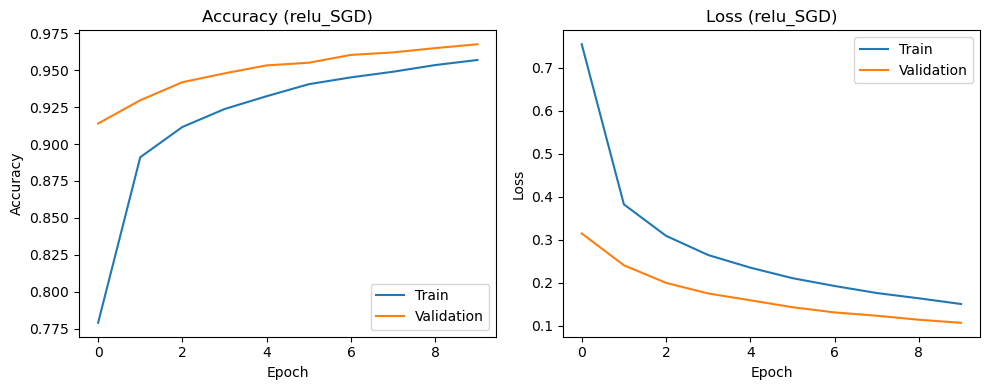

313/313 [==============================] - 0s 508us/step


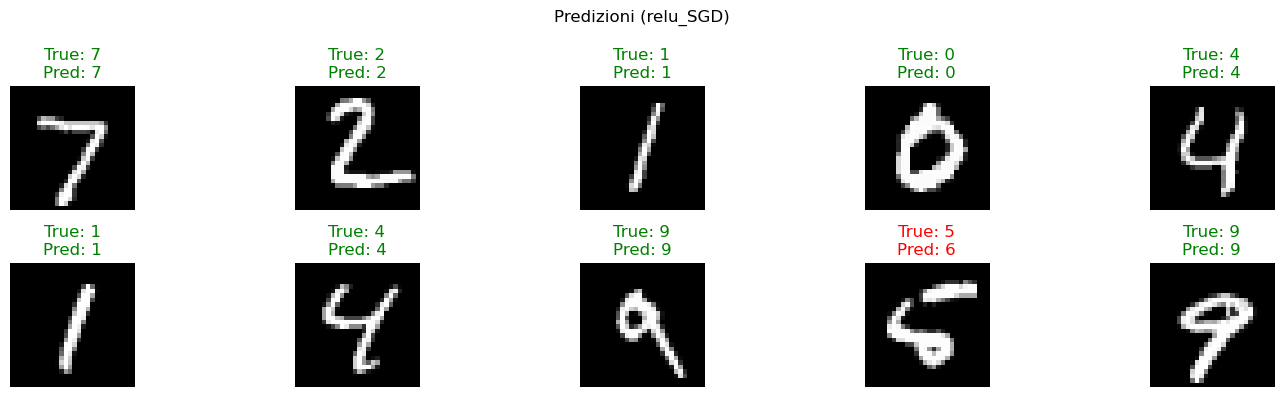


 Attivazione: relu, Ottimizzatore: Adam
 Accuracy: 0.9802, Loss: 0.0968
 Accuracy: 0.9802, Loss: 0.0968


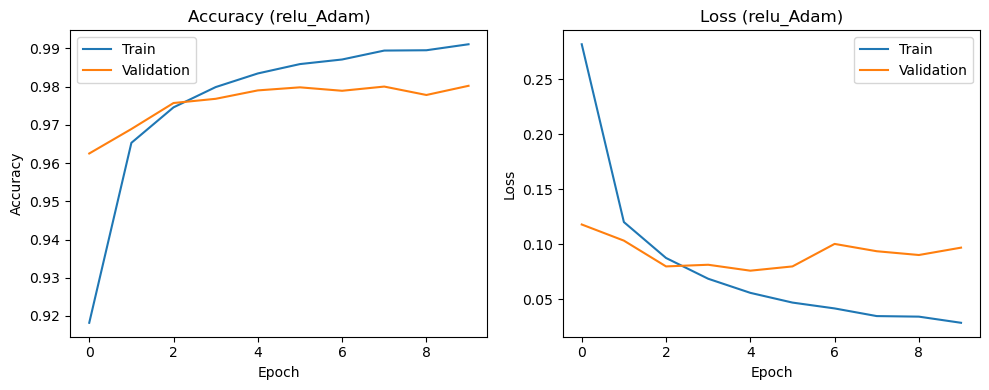

313/313 [==============================] - 0s 513us/step


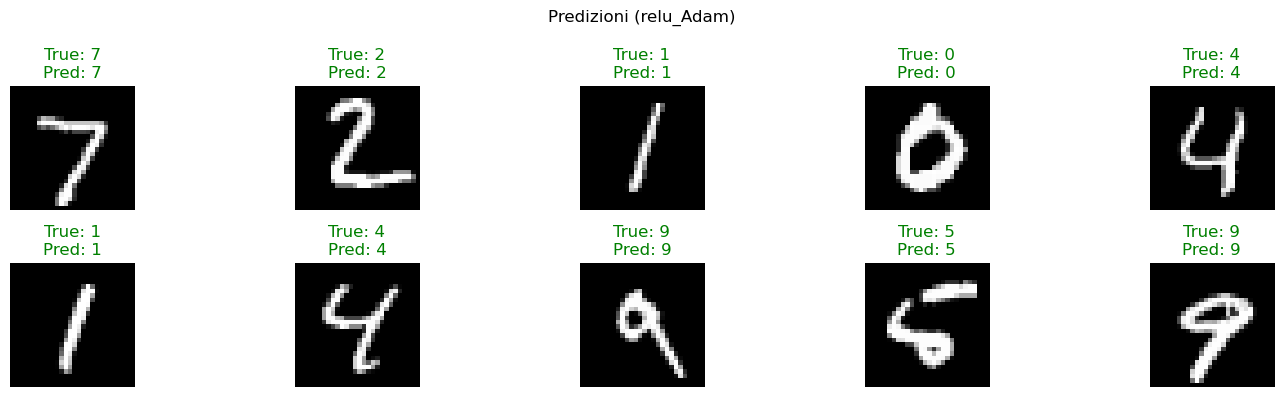


 Attivazione: relu, Ottimizzatore: Adamax
 Accuracy: 0.9813, Loss: 0.0598
 Accuracy: 0.9813, Loss: 0.0598


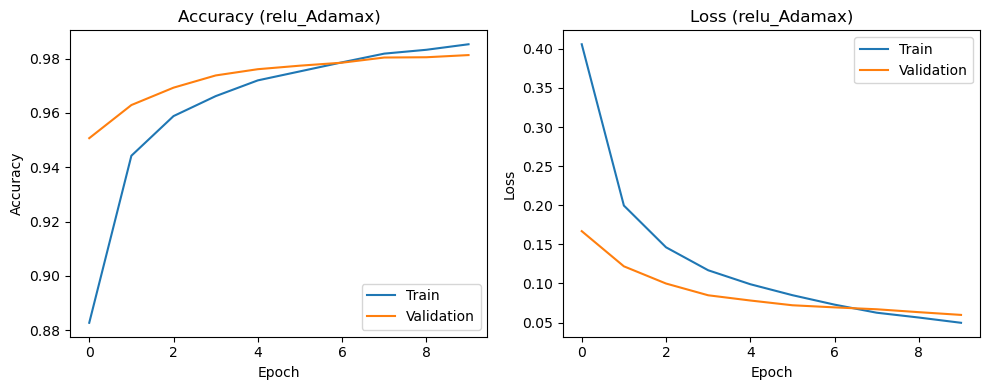

313/313 [==============================] - 0s 497us/step


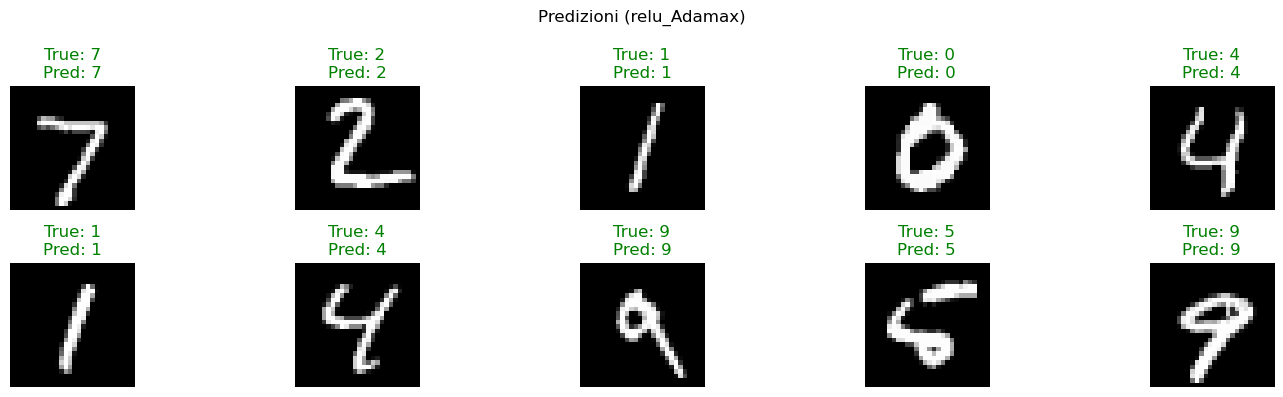


 Riepilogo finale:
relu_SGD: Accuracy = 0.9676, Loss = 0.1068
relu_Adam: Accuracy = 0.9802, Loss = 0.0968
relu_Adamax: Accuracy = 0.9813, Loss = 0.0598


In [5]:
batch_size = 32
epochs = 10

# Activation functions and optimizers
activation_functions = ['relu']
optimizers = {
    'SGD': SGD(),
    'Adam': Adam(),
    'Adamax': Adamax()
}

results = {}

for activation in activation_functions:
    for opt_name, optimizer in optimizers.items():
        print(f"\n Attivazione: {activation}, Ottimizzatore: {opt_name}")

        # Build model
        model = Sequential()
        model.add(keras.Input(shape=(img_rows * img_cols,)))  # migliore stile moderno
        model.add(Dense(400, activation=activation))
        model.add(Dense(100, activation=activation))
        model.add(Dropout(0.5))
        model.add(Dense(num_classes, activation='softmax'))

        # Compile
        model.compile(loss='categorical_crossentropy',
                      optimizer=optimizer,
                      metrics=['accuracy'])

        # Train
        history = model.fit(X_train, Y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=0,
                            validation_data=(X_test, Y_test),
                            shuffle=True)

        # Evaluate
        score = model.evaluate(X_test, Y_test, verbose=0)
        test_acc = score[1]
        test_loss = score[0]

        print(f" Accuracy: {test_acc:.4f}, Loss: {test_loss:.4f}")

        key = f"{activation}_{opt_name}"
        results[key] = {
            'history': history,
            'test_acc': test_acc,
            'test_loss': test_loss
        }

        # Plot accuracy and loss
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train')
        plt.plot(history.history['val_accuracy'], label='Validation')
        plt.title(f'Accuracy ({key})')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train')
        plt.plot(history.history['val_loss'], label='Validation')
        plt.title(f'Loss ({key})')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Predict on test data
        predictions = model.predict(X_test)

        # Reshape X_test to original image shape for visualization
        X_test_vis = X_test.reshape(X_test.shape[0], img_rows, img_cols)

        # Visualize 10 sample predictions
        plt.figure(figsize=(15, 4))
        for i in range(10):
            ax = plt.subplot(2, 5, i + 1)
            plt.imshow(X_test_vis[i], cmap='gray')
            true_label = np.argmax(Y_test[i])
            predicted_label = np.argmax(predictions[i])
            color = 'green' if true_label == predicted_label else 'red'
            plt.title(f'True: {true_label}\nPred: {predicted_label}', color=color)
            plt.axis('off')
        plt.suptitle(f'Predizioni ({key})')
        plt.tight_layout()
        plt.show()

# Summary 
print("\n Riepilogo finale:")
for key, value in results.items():
    print(f"{key}: Accuracy = {value['test_acc']:.4f}, Loss = {value['test_loss']:.4f}")

## <span style="color:blue">  Esercizio 12.2</span>

Si è affrontato il medesimo problema facendo uso di una rete neurale costituita da layer convoluzionali. Una Convolutional Neural Network (CNN) risulta paticolarmente utile per il riconoscimento di cifre scritte a mano innanzitutto perché preserva la topologia dell'immagine attraverso operazioni convoluzionali, catturando pattern locali come linee, curve e bordi. In più, il pooling riduce la sensibilità a piccole traslazioni/rotazioni delle cifre, e questo è utile vista la variabilità nella scrittura a mano (es. cifre spostate o leggermente inclinate). Infine, una DNN presenta maggiore efficienza computazionale: la condivisione dei pesi nei filtri convoluzionali riduce i parametri rispetto a una DNN fully connected.

In [6]:
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


**Layer della CNN**

- **`Conv2D`**: filtri 5×5 con stride=1 e attivazione ReLU per estrarre caratteristiche locali
- **`MaxPooling2D`**: riduce dimensioni prendendo il valore massimo per regione  
- **`Dropout`**: disattiva casualmente neuroni per prevenire overfitting
- **`Flatten`**: converte mappe 2D/3D in vettore 1D per i layer densi

In [7]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(6, kernel_size=(5, 5), strides=1,activation='relu',input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    model.add(Conv2D(16, kernel_size=(5, 5), strides=1,activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adamax',
                  metrics=['acc'])
    return model

In [8]:
# training parameters
batch_size = 32
epochs = 30

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history_CNN = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          shuffle=True, # per riorganizzare dati in modo randomico a ogni epoca
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4932 - acc: 0.8490 - val_loss: 0.1464 - val_acc: 0.9554
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1995 - acc: 0.9408 - val_loss: 0.1026 - val_acc: 0.9684
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1506 - acc: 0.9551 - val_loss: 0.0779 - val_acc: 0.9767
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1266 - acc: 0.9627 - val_loss: 0.0687 - val_acc: 0.9794
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1120 - acc: 0.9672 - val_loss: 0.0594 - val_acc: 0.9824
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1019 - acc: 0.9693 - val_loss: 0.0560 - val_acc: 0.9826
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0942 - acc: 0.9714 - val_loss: 0.0529 - val_acc: 0.9824
Epoch 8/30
1875/1875 [==============================] - 7s 4ms

313/313 [==============================] - 0s 2ms/step - loss: 0.0330 - acc: 0.9896

Test loss: 0.03302174434065819
Test accuracy: 0.9896000027656555

Test loss: 0.03302174434065819
Test accuracy: 0.9896000027656555


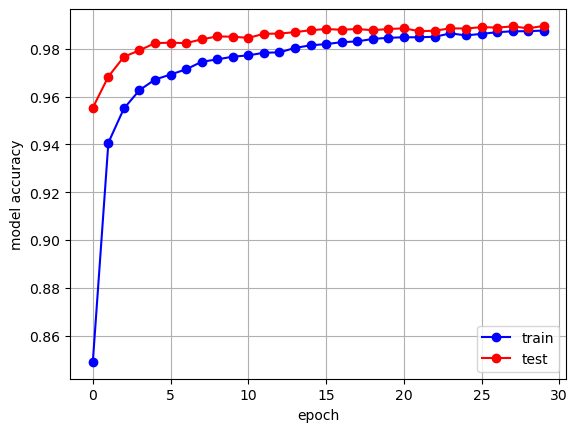

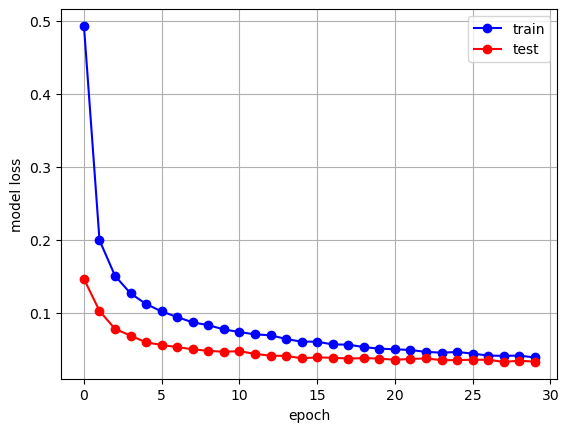

In [9]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history_CNN.history['acc'], 'bo-')
plt.plot(history_CNN.history['val_acc'], 'ro-')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.grid(True)
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history_CNN.history['loss'], 'bo-')
plt.plot(history_CNN.history['val_loss'], 'ro-')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.grid(True)
plt.legend(['train', 'test'], loc='best')
plt.show()

313/313 [==============================] - 0s 1ms/step


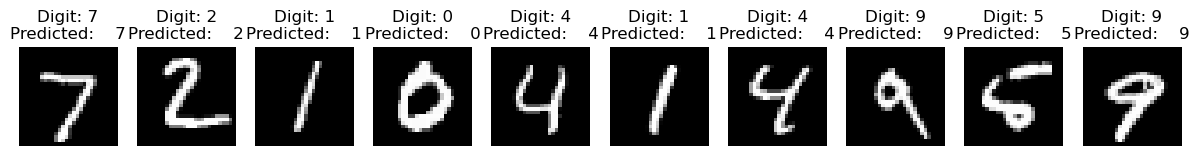

In [10]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

## <span style="color:blue">  Esercizio 12.3</span>

Testo il funzionamento della CNN cone delle cifre scritte a mano da me tramite *gimp*

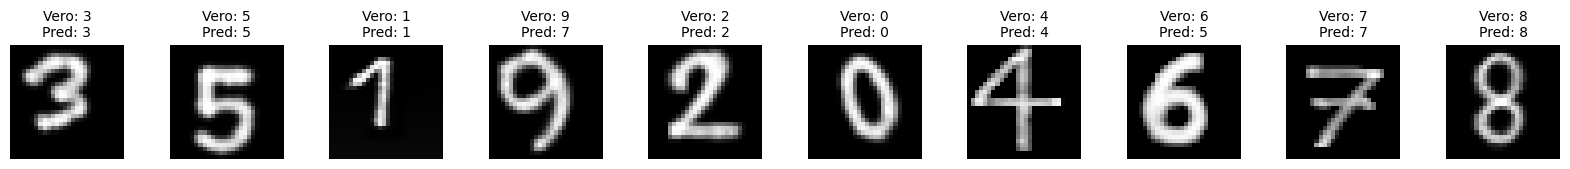

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Lista dei file da processare
file_list = ["3.png", "5.png", "1.png", "9.png", "2.png", "0.png", "4.png", "6.png", "7.png", "8.png"]   

# Crea una singola riga con tutte le immagini
fig, axes = plt.subplots(1, len(file_list), figsize=(20, 4))  # 1 riga, N colonne
plt.subplots_adjust(wspace=0.4)  # Regola lo spazio orizzontale tra le immagini

# Se c'è solo un'immagine, trasforma axes in una lista
if len(file_list) == 1:
    axes = [axes]

for idx, digit_filename in enumerate(file_list):
    try:
        # Caricamento e preprocessing
        digit_in = Image.open(digit_filename).convert('L')
        ydim, xdim = digit_in.size
        data = np.array(digit_in) / 255.0  # Conversione diretta a numpy + normalizzazione
        
        # Predizione
        input_data = data.reshape(1, xdim, ydim, 1)  # Preparazione per la CNN
        pred = model_CNN.predict(input_data, verbose=0)
        predicted_digit = np.argmax(pred)
        confidence = np.max(pred)
        
        # Visualizzazione
        axes[idx].imshow(data, cmap='gray')
        axes[idx].set_title(f"Vero: {digit_filename.split('.')[0]}\nPred: {predicted_digit}", 
                          fontsize=10)
        axes[idx].axis('off')
        
    except Exception as e:
        print(f"Error processing {digit_filename}: {str(e)}")
        axes[idx].axis('off')

plt.show()

Come vediamo risponde bene a quasi tutti, riesce a capire lo 0 storto e l'1 piccolo non ben centrato ma sbaglia sul 9 che è anche un po' storto e sul 6 che immagina essere un 5, quest'ultimo è forse l'errore più grave